In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import csv
import json
import seaborn as sns

#importing libraries


In [146]:
df = pd.read_csv(r'2019-07-west-midlands-street.csv', index_col=False, dtype='unicode')

In [147]:
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,604865d68e06735215930c038635ff6b8105905d45e317...,2019-07,West Midlands Police,West Midlands Police,-1.845290,52.590509,On or near Heathfield Road,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
1,3f1498db80b64a5c51a5e30ea25131c33b06ce4a2a0bd0...,2019-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN
2,0ea6b0cd4c0072b68608e194490c83cfdb051dbaec8588...,2019-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Other crime,Unable to prosecute suspect,NaN
3,NaN,2019-07,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
4,NaN,2019-07,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26530,98de8acb7d054b858a8b0092e5f960ffc2b13515b1dc60...,2019-07,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton 035H,Violence and sexual offences,Investigation complete; no suspect identified,NaN
26531,5fa8cf517d7ccf546c7e1d388b40ce579052481c9fdae5...,2019-07,West Midlands Police,West Midlands Police,-2.118379,52.582702,On or near Bath Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
26532,c4f57cda4462f11d6c74284f099727a67333da2c2825d8...,2019-07,West Midlands Police,West Midlands Police,-2.118379,52.582702,On or near Bath Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
26533,24f2ad8331b863d6da08524c5d0674fc5f6326ec0a0c4e...,2019-07,West Midlands Police,West Midlands Police,-2.120714,52.583904,On or near Pedestrian Subway,E01010530,Wolverhampton 035H,Violence and sexual offences,Court result unavailable,NaN


In [148]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,604865d68e06735215930c038635ff6b8105905d45e317...,2019-07,West Midlands Police,West Midlands Police,-1.845290,52.590509,On or near Heathfield Road,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
1,3f1498db80b64a5c51a5e30ea25131c33b06ce4a2a0bd0...,2019-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN
2,0ea6b0cd4c0072b68608e194490c83cfdb051dbaec8588...,2019-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Other crime,Unable to prosecute suspect,NaN
3,NaN,2019-07,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
4,NaN,2019-07,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN


In [149]:
df.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
26530,98de8acb7d054b858a8b0092e5f960ffc2b13515b1dc60...,2019-07,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton 035H,Violence and sexual offences,Investigation complete; no suspect identified,NaN
26531,5fa8cf517d7ccf546c7e1d388b40ce579052481c9fdae5...,2019-07,West Midlands Police,West Midlands Police,-2.118379,52.582702,On or near Bath Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
26532,c4f57cda4462f11d6c74284f099727a67333da2c2825d8...,2019-07,West Midlands Police,West Midlands Police,-2.118379,52.582702,On or near Bath Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
26533,24f2ad8331b863d6da08524c5d0674fc5f6326ec0a0c4e...,2019-07,West Midlands Police,West Midlands Police,-2.120714,52.583904,On or near Pedestrian Subway,E01010530,Wolverhampton 035H,Violence and sexual offences,Court result unavailable,NaN
26534,74099e70672c796ee46d0fb7b39a9b60a783082d6801c4...,2019-07,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN


In [150]:
df.isnull()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,True,True
4,True,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
26530,False,False,False,False,False,False,False,False,False,False,False,True
26531,False,False,False,False,False,False,False,False,False,False,False,True
26532,False,False,False,False,False,False,False,False,False,False,False,True
26533,False,False,False,False,False,False,False,False,False,False,False,True


In [151]:
df.drop_duplicates()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,604865d68e06735215930c038635ff6b8105905d45e317...,2019-07,West Midlands Police,West Midlands Police,-1.845290,52.590509,On or near Heathfield Road,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
1,3f1498db80b64a5c51a5e30ea25131c33b06ce4a2a0bd0...,2019-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN
2,0ea6b0cd4c0072b68608e194490c83cfdb051dbaec8588...,2019-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Other crime,Unable to prosecute suspect,NaN
3,NaN,2019-07,West Midlands Police,West Midlands Police,-1.845780,52.593827,On or near Hook Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
4,NaN,2019-07,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26530,98de8acb7d054b858a8b0092e5f960ffc2b13515b1dc60...,2019-07,West Midlands Police,West Midlands Police,-2.120244,52.579230,On or near Granville Close,E01010530,Wolverhampton 035H,Violence and sexual offences,Investigation complete; no suspect identified,NaN
26531,5fa8cf517d7ccf546c7e1d388b40ce579052481c9fdae5...,2019-07,West Midlands Police,West Midlands Police,-2.118379,52.582702,On or near Bath Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
26532,c4f57cda4462f11d6c74284f099727a67333da2c2825d8...,2019-07,West Midlands Police,West Midlands Police,-2.118379,52.582702,On or near Bath Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
26533,24f2ad8331b863d6da08524c5d0674fc5f6326ec0a0c4e...,2019-07,West Midlands Police,West Midlands Police,-2.120714,52.583904,On or near Pedestrian Subway,E01010530,Wolverhampton 035H,Violence and sexual offences,Court result unavailable,NaN


In [152]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [153]:
df_subset = df[['Month','Location','Crime type']]
print(df_subset)

         Month                      Location                    Crime type
0      2019-07    On or near Heathfield Road  Violence and sexual offences
1      2019-07       On or near Walsall Road  Violence and sexual offences
2      2019-07       On or near Walsall Road                   Other crime
3      2019-07         On or near Hook Drive         Anti-social behaviour
4      2019-07  On or near Badgers Bank Road         Anti-social behaviour
...        ...                           ...                           ...
26530  2019-07    On or near Granville Close  Violence and sexual offences
26531  2019-07        On or near Bath Street  Violence and sexual offences
26532  2019-07        On or near Bath Street  Violence and sexual offences
26533  2019-07  On or near Pedestrian Subway  Violence and sexual offences
26534  2019-07   On or near Granville Street  Violence and sexual offences

[26535 rows x 3 columns]


In [154]:
df.drop_duplicates
df.isnull()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,True,True
4,True,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
26530,False,False,False,False,False,False,False,False,False,False,False,True
26531,False,False,False,False,False,False,False,False,False,False,False,True
26532,False,False,False,False,False,False,False,False,False,False,False,True
26533,False,False,False,False,False,False,False,False,False,False,False,True


In [155]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [156]:

dd = df.loc[df['Crime type'] != 0]

tot_delayed_f = len(dd)

months = dd.groupby('Month')

month = months['Crime ID'].count()

average = monthly_delays/tot_delayed_f

monthly_dd = pd.DataFrame({'Total Crime type':monthly_delays, '% Crime type': average})
monthly_dd

,Total Crime type,% Crime type
Month,,
2019-07,22600,0.851705


In [157]:
search  = df["Crime type"].value_counts()
search

Violence and sexual offences    8537
Anti-social behaviour           3935
Vehicle crime                   2581
Criminal damage and arson       2091
Burglary                        2018
Other theft                     1813
Public order                    1670
Shoplifting                     1495
Robbery                          712
Drugs                            526
Other crime                      407
Possession of weapons            280
Theft from the person            259
Bicycle theft                    211
Name: Crime type, dtype: int64

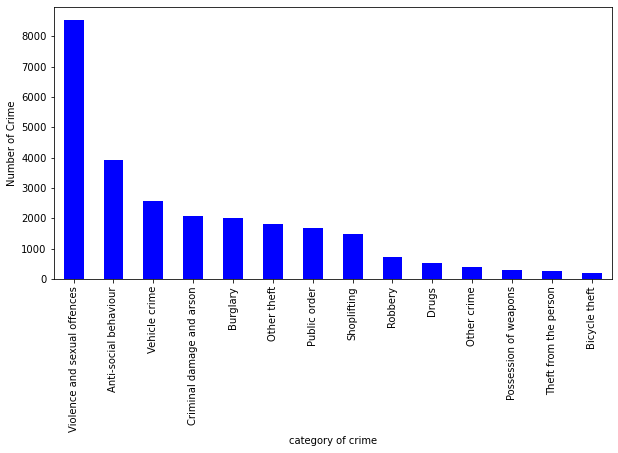

In [158]:
plot_outcome = search.plot.bar(figsize=(10,5) , color = 'blue')
plt.xlabel("category of crime")
plt.ylabel("Number of Crime")
plt.title("")
plt.show()